In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RV = pd.read_csv('RV_Uma_1.csv')
SS = pd.read_csv('StandardStar_1.csv')

In [3]:
BlueFracError = (np.std(SS['Aperture Sum'].where(SS['Filter']=='Blue'))/np.mean(SS['Aperture Sum'].where(SS['Filter']=='Blue')))/10

RedFracError = (np.std(SS['Aperture Sum'].where(SS['Filter']=='Red'))/np.mean(SS['Aperture Sum'].where(SS['Filter']=='Red')))/10

GreenFracError = (np.std(SS['Aperture Sum'].where(SS['Filter']=='Green'))/np.mean(SS['Aperture Sum'].where(SS['Filter']=='Green')))/10

LuminanceFracError = (np.std(SS['Aperture Sum'].where(SS['Filter']=='Luminance'))/np.mean(SS['Aperture Sum'].where(SS['Filter']=='Luminance')))/10

TotFracErrors = ((BlueFracError**2 + RedFracError**2 + GreenFracError**2 + LuminanceFracError**2)**(1/2))
print(BlueFracError, RedFracError, GreenFracError, LuminanceFracError, TotFracErrors)

0.04652736813571502 0.025284890258768233 0.030883305897653764 0.031231949375926153 0.0687992362313912


In [4]:
AppMagBlueSS = 11.4625 # of TYC 3850-738-1 from SIMBAD 
AppMagGreenSS = 11.190873
AppMagRedSS = 10.7577
AppMagLuminanceSS = 11.28

BlueOffset = AppMagBlueSS - SS['Instrumental Magnitude'][0]
RV['Blue Apparent Magnitude'] = (RV['Instrumental Magnitude'].where(RV['Filter'] == 'Blue')) + BlueOffset
SS['Blue Apparent Magnitude'] = SS['Instrumental Magnitude'].where(RV['Filter'] == 'Blue') + BlueOffset

RedOffset = AppMagRedSS - SS['Instrumental Magnitude'][0]
RV['Red Apparent Magnitude'] = RV['Instrumental Magnitude'].where(RV['Filter'] == 'Red') + RedOffset
SS['Red Apparent Magnitude'] = SS['Instrumental Magnitude'].where(RV['Filter'] == 'Red') + RedOffset

GreenOffset = AppMagGreenSS - SS['Instrumental Magnitude'][0]
RV['Green Apparent Magnitude']= RV['Instrumental Magnitude'].where(RV['Filter'] == 'Green') + GreenOffset
SS['Green Apparent Magnitude'] = SS['Instrumental Magnitude'].where(RV['Filter'] == 'Green') + GreenOffset

LuminanceOffset = AppMagLuminanceSS - SS['Instrumental Magnitude'][0]
RV['Luminance Apparent Magnitude'] = RV['Instrumental Magnitude'].where(RV['Filter'] == 'Luminance') + LuminanceOffset
SS['Luminance Apparent Magnitude'] = SS['Instrumental Magnitude'].where(RV['Filter'] == 'Luminance') + LuminanceOffset


C:\Software\Anaconda\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Software\Anaconda\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


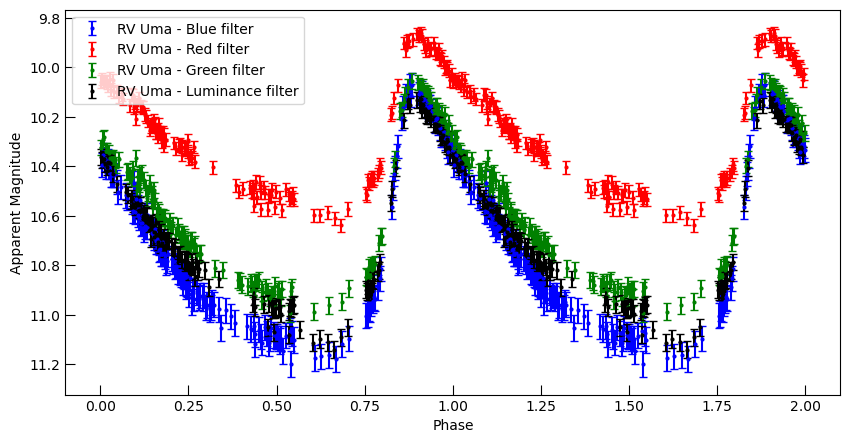

In [5]:
#Plots counts agasint time of
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)


#In Instrumental Magnitude
ax.errorbar(RV['Phase'], RV['Blue Apparent Magnitude'], yerr=(RV['Blue Apparent Magnitude']*BlueFracError/10), marker = 'o', markersize=2, color = 'blue', linestyle='none', capsize=3, label="RV Uma - Blue filter") 
ax.errorbar(RV['Phase']+1, RV['Blue Apparent Magnitude'], yerr=(RV['Blue Apparent Magnitude']*BlueFracError/10), marker = 'o', markersize=2, color = 'blue',capsize=3, linestyle='none') 

ax.errorbar(RV['Phase'], RV['Red Apparent Magnitude'], yerr=(RV['Red Apparent Magnitude']*RedFracError/10), marker = 'o', markersize=2, color = 'red', linestyle='none',capsize=3, label="RV Uma - Red filter") 
ax.errorbar(RV['Phase']+1, RV['Red Apparent Magnitude'], yerr=(RV['Red Apparent Magnitude']*RedFracError/10), marker = 'o', markersize=2, color = 'red',capsize=3, linestyle='none') 

ax.errorbar(RV['Phase'], RV['Green Apparent Magnitude'], yerr=(RV['Green Apparent Magnitude']*GreenFracError/10), marker = 'o', markersize=2, color = 'green', linestyle='none',capsize=3, label="RV Uma - Green filter") 
ax.errorbar(RV['Phase']+1, RV['Green Apparent Magnitude'], yerr=(RV['Green Apparent Magnitude']*GreenFracError/10), marker = 'o', markersize=2, color = 'green',capsize=3, linestyle='none')


ax.errorbar(RV['Phase'], RV['Luminance Apparent Magnitude'].where(RV['Filter'] == "Luminance"), yerr=(RV['Luminance Apparent Magnitude']*LuminanceFracError/10), marker = 'o', markersize=2, color = 'black', linestyle='none',capsize=3, label="RV Uma - Luminance filter") 
ax.errorbar(RV['Phase']+1, RV['Luminance Apparent Magnitude'].where(RV['Filter'] == "Luminance"), yerr=(RV['Luminance Apparent Magnitude']*LuminanceFracError/10), marker = 'o', markersize=2, color = 'black',capsize=3, linestyle='none') 

"""
ax.errorbar(SS['Phase'], SS['Blue Apparent Magnitude'], yerr=(SS['Blue Apparent Magnitude']*BlueFracError/10), marker = 'o', markersize=2, color = 'black', linestyle='none', capsize=3,label="TYC 3850-738-1") 
ax.errorbar(SS['Phase']+1, SS['Blue Apparent Magnitude'], yerr=(SS['Blue Apparent Magnitude']*BlueFracError/10), marker = 'o', markersize=2, color = 'black', capsize=3,linestyle='none') 

ax.errorbar(SS['Phase'], SS['Red Apparent Magnitude'], yerr=(RV['Red Apparent Magnitude']*RedFracError/10), marker = 'o', markersize=2, color = 'black', linestyle='none',capsize=3, label="TYC 3850-738-1") 
ax.errorbar(SS['Phase']+1, SS['Red Apparent Magnitude'], yerr=(RV['Red Apparent Magnitude']*RedFracError/10), marker = 'o', markersize=2, color = 'black', capsize=3,linestyle='none')

ax.errorbar(SS['Phase'], SS['Green Apparent Magnitude'], yerr=(RV['Green Apparent Magnitude']*GreenFracError/10), marker = 'o', markersize=2, color = 'black', linestyle='none',capsize=3, label="TYC 3850-738-1") 
ax.errorbar(SS['Phase']+1, SS['Green Apparent Magnitude'], yerr=(RV['Green Apparent Magnitude']*GreenFracError/10), marker = 'o', markersize=2, color = 'black',capsize=3, linestyle='none')

ax.errorbar(SS['Phase'], SS['Luminance Apparent Magnitude'], yerr=(SS['Luminance Apparent Magnitude']*LuminanceFracError/10), marker = 'o', markersize=2, color = 'black', linestyle='none',capsize=3, label="TYC 3850-738-1") 
ax.errorbar(SS['Phase']+1, SS['Luminance Apparent Magnitude'], yerr=(SS['Luminance Apparent Magnitude']*LuminanceFracError/10), marker = 'o', markersize=2, color = 'black', capsize=3,linestyle='none')
"""

ax.invert_yaxis()
ax.set_ylabel('Apparent Magnitude')

ax.set_xlabel('Phase')

ax.tick_params(direction='in', length = 7)
plt.rcParams.update({'font.size':10})

ax.legend()

In [6]:
a = -0.97 #from report
b = -2.2
Period = 0.468060 # from Vickys paper

AbsMag = a + b*np.log10(Period)

MeanBlueAppMag = (RV['Blue Apparent Magnitude']).mean()
MeanRedAppMag = (RV['Red Apparent Magnitude']).mean()
MeanGreenAppMag = (RV['Green Apparent Magnitude']).mean()
MeanLuminanceAppMag = (RV['Luminance Apparent Magnitude']).mean()
    
BlueDis = 10**(((MeanBlueAppMag + AbsMag) + 5)/5)
RedDis = 10**(((MeanRedAppMag + AbsMag) + 5)/5)
GreenDis = 10**(((MeanGreenAppMag + AbsMag) + 5)/5)
LuminanceDis = 10**(((MeanLuminanceAppMag + AbsMag) + 5)/5)
print(BlueDis,RedDis,GreenDis,LuminanceDis )

1229.9690055009194 1002.8529338438814 1153.8876786017288 1204.0236897636448


In [7]:
Distances = [BlueDis, RedDis, GreenDis, LuminanceDis]
MeanDistance = np.mean(Distances)
StdDistance = np.std(Distances)

DisFracError = StdDistance/MeanDistance

TotalFracError = (DisFracError**2 + TotFracErrors**2)**(1/2)

ErrorDistance = TotalFracError * MeanDistance

In [8]:
print("(",MeanDistance, " ± ", ErrorDistance,") parsecs")

( 1147.6833269275437  ±  118.21385913596659 ) parsecs
